# Curse of dimensionality
## *Apply PCA

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(23)
mu_vecl= np.array([0,0,0])
cov_mat1= np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample= np.random.multivariate_normal(mu_vecl,cov_mat1,20)
df=pd.DataFrame(data=class1_sample,columns=['f1','f2','f3'])
df['target']=1

mu_vec2=np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)
df1=pd.DataFrame(data=class2_sample,columns=['f1','f2','f3'])
df1['target']=0

# Use pd.concat instead of df.append
df=pd.concat([df, df1], ignore_index=True)
df = df.sample(40)

In [ ]:
df.head()

,f1,f2,f3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='f1', y='f2', z='f3',
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
#

#Step 1 - Apply standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

#Step 2 -Find Covariance Matrix

In [ ]:
covariance_matrix = np.cov([df.f1, df.f2, df.f3])
print(covariance_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


#Step 3-Finding Ev and Evs

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(eigen_values)
print(eigen_vectors)

[1.3536065  0.94557084 0.77774573]
[[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


Populating the interactive namespace from numpy and matplotlib


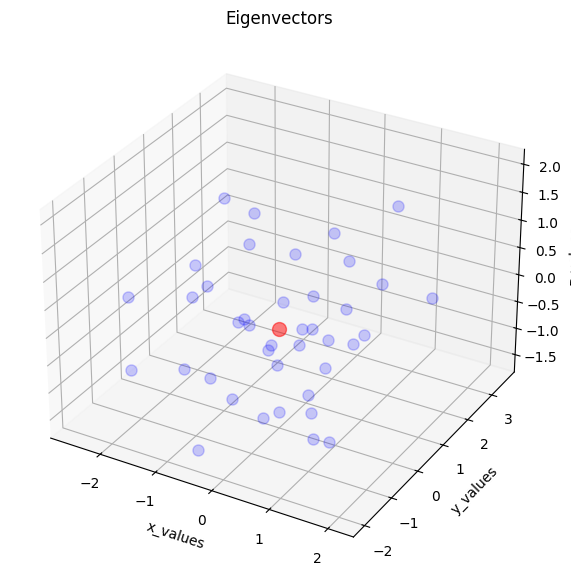

In [ ]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np


class Arrow3D(FancyArrowPatch): # Inherit from FancyArrowPatch
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs) # Initialize FancyArrowPatch
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        # Always use renderer._proj, check if the attribute exists, and fallback to returning np.nan if not.
        if hasattr(renderer, '_proj'):
             xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer._proj)
             self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
             FancyArrowPatch.draw(self, renderer) # Use parent's draw method
        else:
            pass # Do nothing if the transform fails.
            # alternative, you can return, but drawing will not happen
    def do_3d_projection(self, renderer=None): # Implement the method
        xs3d, ys3d, zs3d = self._verts3d
        if renderer is None:  # Check if renderer is None
            return np.inf # Return a large value for sorting when no renderer
        # Always use renderer._proj, check if the attribute exists, and fallback to returning np.nan if not.
        if hasattr(renderer, '_proj'):
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer._proj)
        else:
            return np.nan  # or return some other default values
        return np.min(zs) # return z-order for sorting


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df.f1, df.f2, df.f3, 'o',markersize=8, alpha=0.2, color='blue')
ax.plot([df['f1'].mean()],[df['f2'].mean()],[df['f3'].mean()],'o',markersize=10,color='red',alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['f1'].mean(),df['f1'].mean()+v[0]], [df['f2'].mean(), df['f2'].mean()+v[1]],[df['f3'].mean(),df['f3'].mean()+v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a) # use the custom class as the artist
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()

In [ ]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [ ]:
transformd_df=np.dot(df.iloc[:,0:3],pc.T)
new_df=pd.DataFrame(data=transformd_df,columns=['pc1','pc2'])
new_df['target']=df['target']
new_df.head()

,pc1,pc2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,1
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [ ]:
new_df['target']= new_df['target'].astype('str')
fig= px.scatter(new_df,x='pc1',y='pc2',color='target',width=700,height=500)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

#pca-demo-1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
#load the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [ ]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Applying PCA Algorithms
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

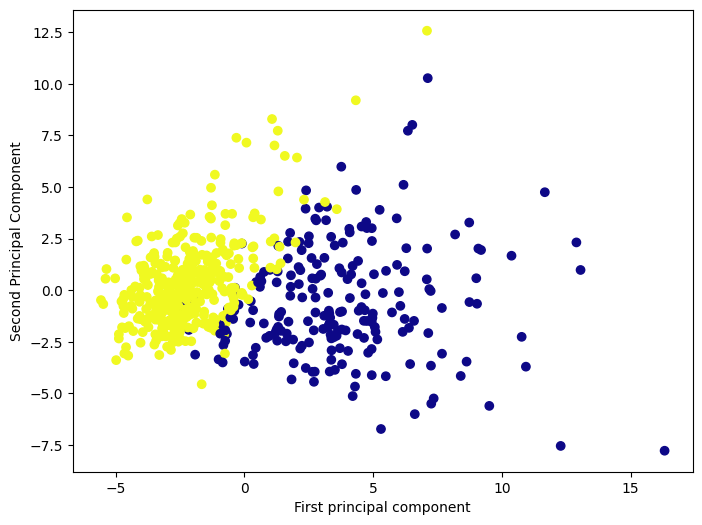

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')